In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def dfdx(x,f):
    return x**2 + x

In [59]:
def f_int(x,C):
    return (x**3)/3.0 + 0.5*x**2 + C

# define 2nd order RK method

In [60]:
def rk2_core(x_i,f_i,h,g):
    #advance f by a step h
    #half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    #full step
    f_ipo = f_i + h*g(x_ipoh,f_ipoh)
    
    return f_ipo

# define a wrapper function for rk2

In [66]:
def rk2(dfdx,a,b,f_a,N):
    
    #dfdx is the derivative wrt x
    #a is the lower bound
    #b is the upper bound
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #define our steps
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a #value of f at a
    
    #evolve f along x
    for i in range(1,N):
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

# Define the 4th order RK method

In [67]:
def rk4_core(x_i,f_i,h,g):
    
    #define x at 1/2 step
    x_ipoh = x_i + 0.5*h
    
    #define x at 1 step
    x_ipo = x_i + h
    
    #advance by a step h 
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo,  f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 + 2*k_3 +k_4)/6.
    
    return f_ipo

# Define a wrapper for rk4

In [68]:
def rk4(dfdx,a,b,f_a,N):
    
    #dfdx is the derivative wrt x
    #a is the lower bound
    #b is the upper bound
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #define our steps
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a #value of f at a
    
    #evolve f along x
    for i in range(1,N):    
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

# perform the integration

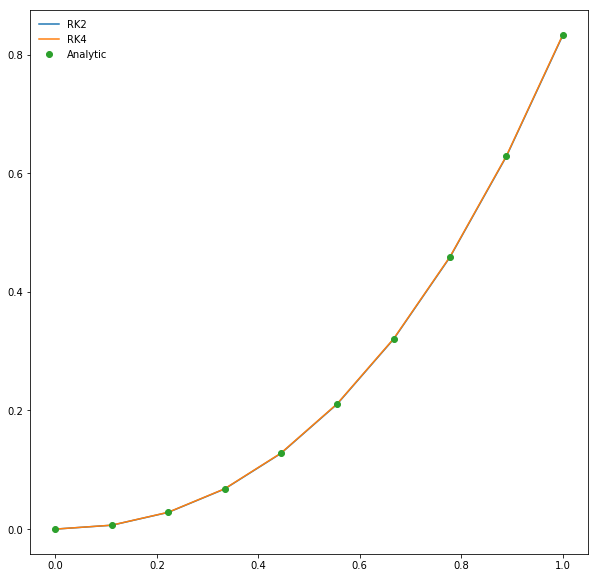

In [71]:
a = 0.0
b = 1.0 
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
fig = plt.figure(figsize=(10,10))
plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)

# plot the error

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
No handles with labels found to put in legend.


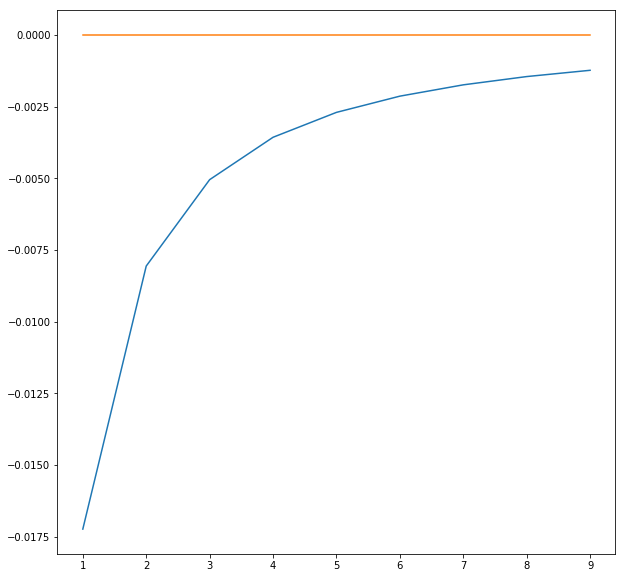

In [80]:
a = 0.0
b = 1.0 
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()

fig = plt.figure(figsize=(10,10))
f_analytic = f_int(x,f_a)
error_2 = (f_2 - f_analytic)/f_analytic
error_4 = (f_4 - f_analytic)/f_analytic
plt.plot(error_2)
plt.plot(error_4)
plt.legend(frameon=False)


#fig = plt.figure(figsize=(10,10))
#plt.plot(x_2,f_2,label='RK2')
#plt.plot(x_4,f_4,label='RK4')
#plt.plot(x,f_int(x,f_a),'o',label='Analytic')
#plt.legend(frameon=False)

In [81]:
print(error_4)

[            nan -1.30822077e-16 -2.44763887e-16  0.00000000e+00
  0.00000000e+00 -1.31246365e-16  1.72938587e-16  2.41718044e-16
  1.76457686e-16  1.33226763e-16]


In [82]:
print(error_2)

[        nan -0.01724138 -0.00806452 -0.00505051 -0.00357143 -0.0027027
 -0.00213675 -0.00174216 -0.00145349 -0.00123457]
